# Lesson 4
# Renuka Mulay


Read the Pima Indian Diabetes data from Internet and Assign Columns Names.

In [382]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
#Read the Pima Indian Diabetes data from Internet and Assign Columns Names.
originalData = pd.read_csv('https://raw.githubusercontent.com/renukamulay/NoteBookShare/master/pimadiabetes.csv', header=None)
selectedColumns = [0,1,7,8]
data = originalData[selectedColumns]
data.columns=['Pregnant_Count', 'Glucose_Concentration', 'Age', 'Class']
data.head(5)


,Pregnant_Count,Glucose_Concentration,Age,Class
0,6,148,50,1
1,1,85,31,0
2,8,183,32,1
3,1,89,21,0
4,0,137,33,1


Impute Data 

In [383]:
# Validate Before changing
print(f"""Minimun value before Imputing Missing value = {data.describe()['Glucose_Concentration']['min']}""")

#Column Glucose_Concentration cannot have 0 value, and the ones that contain 0 value are the Missing Values.
missingValue = 0
#Replace 0 values with NaN so that Pandas ignores those values while caculating median.
data.loc[(data.Glucose_Concentration == missingValue),'Glucose_Concentration'] = np.NaN
missingValueReplacement = data.median()['Glucose_Concentration']

# replace the missing values(NaN) with the Median
data.Glucose_Concentration =  data["Glucose_Concentration"].fillna(missingValueReplacement)

# Validate After changing
print(f"""Minimun value after Imputing Missing value = {data.describe()['Glucose_Concentration']['min']}""")


Minimun value before Imputing Missing value = 0.0
Minimun value after Imputing Missing value = 44.0


Remove Outliers

In [384]:
# Remove Outlier based on the Z Score.
# Outliers are removed based on the z score. If Z Score > 3 then the whole row is removed.
from scipy import stats
import numpy as np
print(f"""Shape before removing the outliers {data.shape}""")
data = data[np.abs(stats.zscore(data) < 3).all(axis=1)]
print(f"""Shape after removing the outliers {data.shape}""")

Shape before removing the outliers (768, 4)
Shape after removing the outliers (759, 4)


Create Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171D850CC88>]],
      dtype=object)

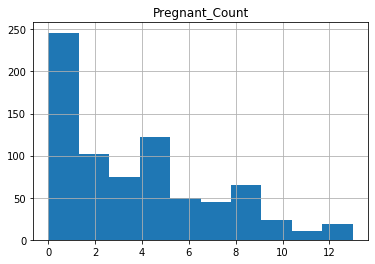

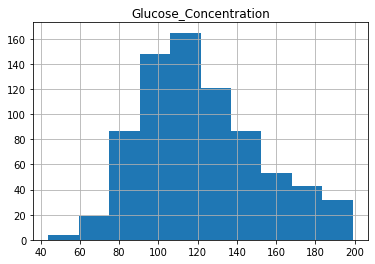

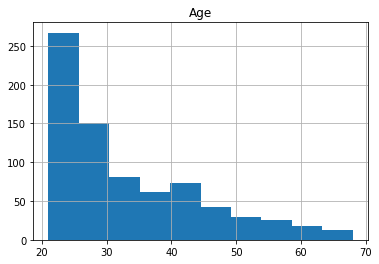

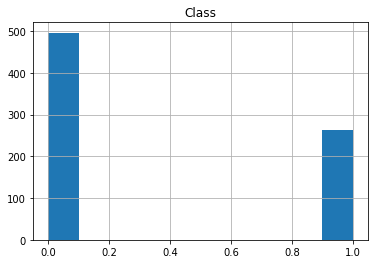

In [385]:
# Create Histogram for different Numeric Columns.

data.hist(column='Pregnant_Count')
data.hist(column='Glucose_Concentration')
data.hist(column='Age')
data.hist(column='Class')

Create Scatter Plot

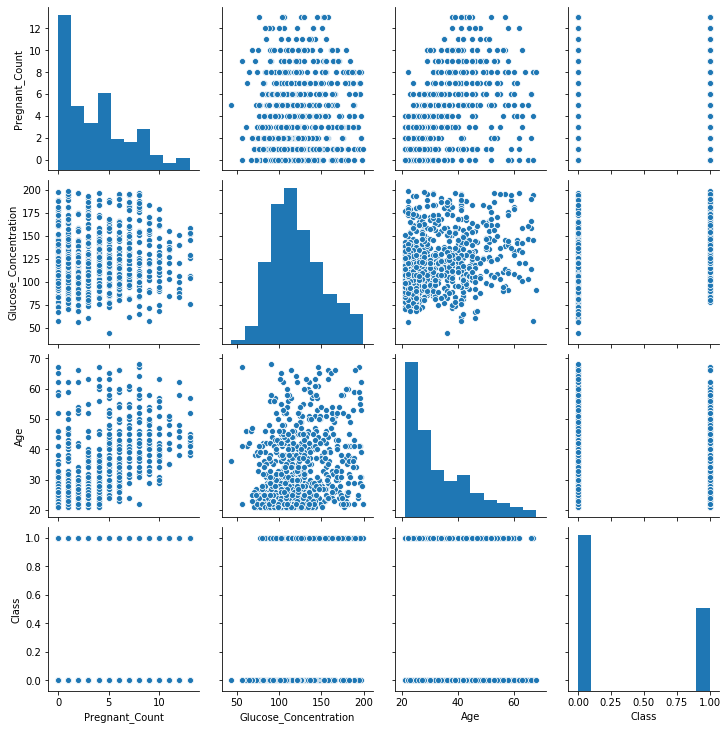

In [386]:
#Create ScatterPlot for the Numeric Columns in the DataFrame
sns.pairplot(data);


Print Standard Deviation

In [387]:

# Print the Standard Deviation of all Numeric columns.

standard_Deviation = data.std()
print(f"""Standard Deviation of Pregnant Count = {standard_Deviation['Pregnant_Count']}""")
print(f"""Standard Deviation of Glucose_Concentration = {standard_Deviation['Glucose_Concentration']}""")
print(f"""Standard Deviation of Age = {standard_Deviation['Age']}""")
print(f"""Standard Deviation of Class = {standard_Deviation['Class']}""")

Standard Deviation of Pregnant Count = 3.2828036454736123
Standard Deviation of Glucose_Concentration = 30.48298164354202
Standard Deviation of Age = 11.361376214864604
Standard Deviation of Class = 0.47617130641525685


Summary

Q)Which attributes had outliers and how were the outliers defined? 
A)The outliers where present in the 1) Pregnant_Count and 2) Age Columns. They were defined by using the Z score. If the absolute value of Z score is less than 3 then those rows are removed.

Q)Which attributes required imputation of missing values and why? 
A)Missing values were found in 1) Glucose Concentration. The value was 0 which is not possible, it was replaced by the median of the non missing values of Glucose Concentration.

Q)Which attributes were histogrammed and why?  
A)All the 4 columns were histogramed since all of them are numeric.

Q)Which attributes were removed and why? 
A)Some values who had a z score greater than 3, those were removed. These values were present in  1)Pregnant_Count and 2) Age Columns.

Q)How did you determine which rows should be removed?
A)Calculated the Z score, and then the values > 3 were removed.